<a href="https://colab.research.google.com/github/QuangHPV/sc1015-project/blob/main/4_XGBoost_Weather_AUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost for Weather_AUS dataset

In this notebook, I will use XGBoost for processing the Weather_AUS dataset. I will use the model to classify whether tomorrow will rain or not

## Load the dataset

In [1]:
!git clone https://github.com/QuangHPV/sc1015-project.git

Cloning into 'sc1015-project'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 30 (delta 3), reused 19 (delta 1), pack-reused 0
Receiving objects: 100% (30/30), 8.63 MiB | 13.95 MiB/s, done.
Resolving deltas: 100% (3/3), done.


## Import libraries

In [2]:
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
# Import specific model
import xgboost as xgb
from xgboost import XGBClassifier

# Preprocess

In [4]:
df = pd.read_csv('/content/sc1015-project/data/weatherAUS_cleaned.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,3.84,7.76,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,5.04,9.82,14,44.0,6,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,4.52,9.50,15,46.0,13,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,3.52,8.54,4,24.0,9,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,4.44,10.46,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [5]:
df.shape

(145460, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  int64  
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int64  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int64  
 10  WindDir3pm     145460 non-null  int64  
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [7]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,23.793524,12.192433,23.216219,2.351830,5.140667,8.101176,8.09360,39.744036,6.999526,7.798852,...,68.933958,51.553371,1017.778522,1015.409354,5.428186,5.526055,16.973123,21.694656,0.219167,0.219146
std,14.228687,6.376015,7.098887,8.397254,3.337079,2.965555,4.69411,13.300729,4.515839,4.538135,...,18.925838,20.575507,6.838559,6.783088,2.583504,2.424496,6.479501,6.882316,0.413683,0.413669
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.00000,6.000000,0.000000,0.000000,...,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,11.000000,7.600000,18.000000,0.000000,3.200000,6.900000,4.00000,31.000000,3.000000,4.000000,...,57.000000,37.000000,1013.400000,1010.900000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000
50%,24.000000,12.000000,22.600000,0.000000,4.660000,8.780000,9.00000,37.000000,7.000000,8.000000,...,70.000000,52.000000,1017.800000,1015.400000,7.000000,7.000000,16.700000,21.200000,0.000000,0.000000
75%,36.000000,16.800000,28.200000,0.800000,6.240000,10.020000,13.00000,46.000000,11.000000,12.000000,...,83.000000,65.000000,1022.300000,1019.900000,7.000000,7.000000,21.500000,26.300000,0.000000,0.000000
max,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,15.00000,135.000000,15.000000,15.000000,...,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000


## Create a numerical dataset

In [8]:
categorical_columns = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Cloud9am', 'Cloud3pm']
for col in categorical_columns:
    unique_labels = df[col].unique()
    print(f'Unique labels in {col}', unique_labels)

Unique labels in Date ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Unique labels in Location [ 2  4 10 11 21 24 26 27 30 34 37 38 42 45 47  9 40 23  5  6 35 19 18 20
 25 33 44 12  7  8 14 39  0 22 28 48  1 46 29 32 31 36 43 15 17  3 13 16
 41]
Unique labels in WindGustDir [13 14 15  4  6  3  5 12  1 10  8  7  9  2  0 11]
Unique labels in WindDir9am [13  6  9  1 12 10  8  4  3 11 15  2  0  7 14  5]
Unique labels in WindDir3pm [14 15  0  7 13 10  2  1  6 11 12  9  3  8  5  4]
Unique labels in RainToday [0 1]
Unique labels in RainTomorrow [0 1]
Unique labels in Cloud9am [8. 7. 1. 0. 5. 4. 2. 6. 3. 9.]
Unique labels in Cloud3pm [7. 2. 8. 1. 5. 4. 6. 3. 0. 9.]


In [9]:
df_numerical = df.drop(columns=categorical_columns)
df_numerical.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,3.84,7.76,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,5.04,9.82,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,4.52,9.50,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,3.52,8.54,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,4.44,10.46,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7


# Problem Statement
From the numerical dataset, I will create a XGBoost Model for predicting whether today is raining or not. XGBoost is a tree-based model, and it's really good at classification and regression task, as it capacity and its mechanism behind.

For better prediction, I will use Standard Scaler to Normalize data, make the model easier to learn from our cleaned numerical dataset

# Feature Selection

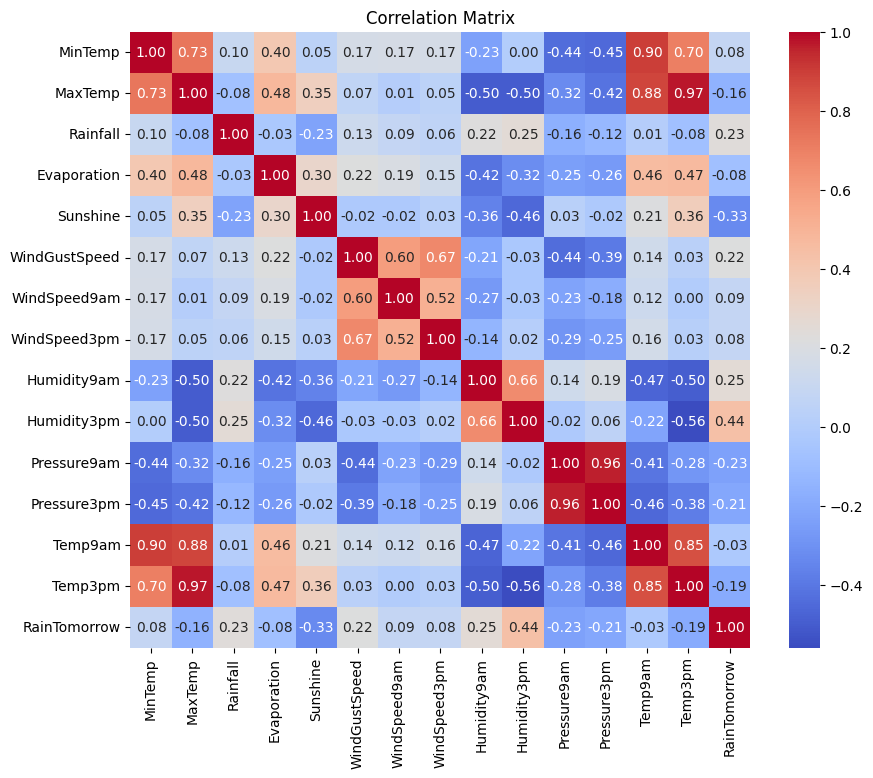

In [18]:
# Calculate the correlation matrix
correlation_matrix = pd.concat([X, y], axis=1).corr()

# Display the correlation matrix
correlation_matrix

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From our feature engineering, it seems like we can use `Humidity3pm` and `Sunshine` to predict whether Tomorrow will rain or not (as they have highest correlation in with `RainTomorrow`). Let's do it again

# Model

In [19]:
X = df_numerical[['Humidity3pm', 'Sunshine']]
y = df['RainTomorrow']
print('Len of X', len(X))
print('Len of y', len(y))

Len of X 145460
Len of y 145460


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Initialize the classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


# Fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [24]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.824694073972226

Then, I will use confusion matrix to see which part of our model is weak.

In [26]:
# utils for visualization
def visualize_preds(y_true, y_pred, title):
    ls = []
    f = plt.figure(figsize = (8,8))
    cf = confusion_matrix(y_true, y_pred)
    sns.heatmap(cf, fmt='.0f', annot=True)

    accuracy  = np.trace(cf) / float(np.sum(cf))

    # Metrics for Binary Confusion Matrices
    if sum(cf[:,1]) == 0:
        precision = 0.0;
    else:
        precision = cf[1,1] / sum(cf[:,1])

    if sum(cf[1,:]) == 0:
        recall = 0.0;
    else:
        recall    = cf[1,1] / sum(cf[1,:])

    if (precision + recall) == 0:
        f1_score = 0.0;
    else:
        f1_score  = 2 *precision * recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        accuracy,precision,recall,f1_score)

    ls.append(accuracy)
    ls.append(precision)
    ls.append(recall)
    ls.append(f1_score)
    ls = pd.DataFrame(ls)


    plt.xlabel('Predicted' + stats_text)
    plt.ylabel('Actual')
    plt.title(title)


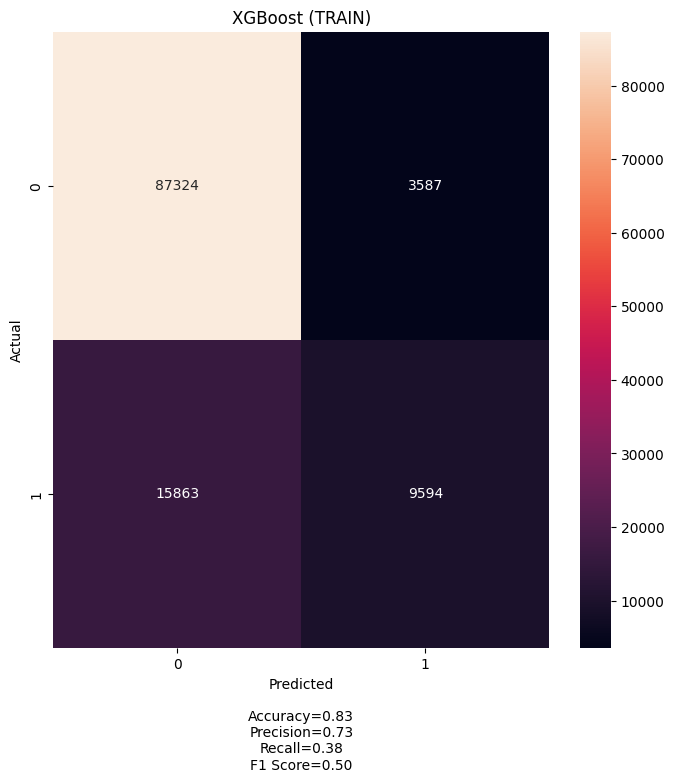

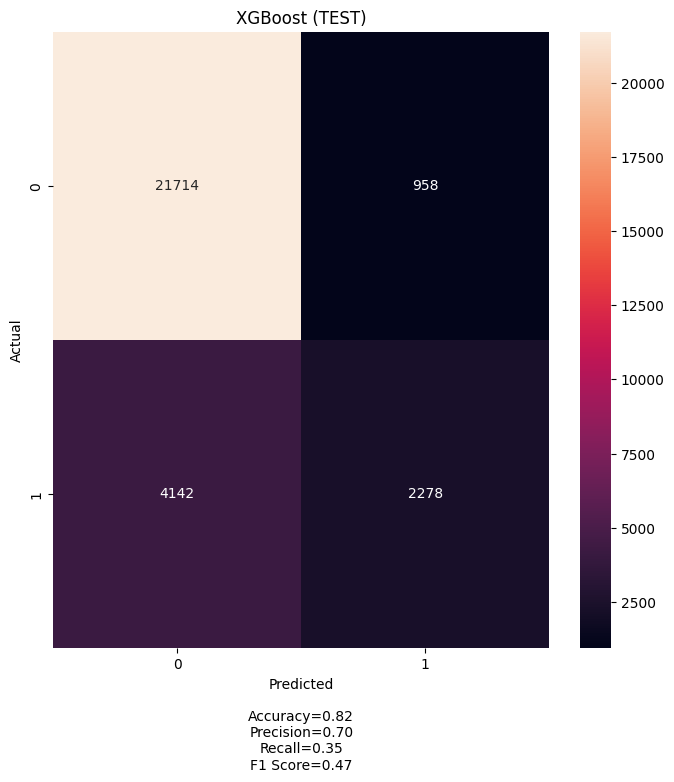

In [28]:
#Predict the data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Visualizing the data
visualize_preds(y_train,y_train_pred, title = 'XGBoost (TRAIN)')
visualize_preds(y_test,y_test_pred, title = 'XGBoost (TEST)')


### Important Insights:

Based on the previous experiment, we can see that the accuracy of XgBoost when we use 2 features to do the classification is 0.82 on test set. However, as XGBoost is quite data-exhausting, we will try to provide all the dataset for it to process, and hope it can archive high accuracy score

# Remodel

At this time, we will feed all the data to the model

In [30]:
X = df_numerical
y = df['RainTomorrow']
print('Len of X', len(X))
print('Len of y', len(y))

Len of X 145460
Len of y 145460


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Initialize the classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


# Fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [34]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8484463082634401

As can be seen, the accuracy rise from 0.82 to 0.84, which shows that XGboost works quite well when have more dataset. Now, I will provide some graph for better comparision

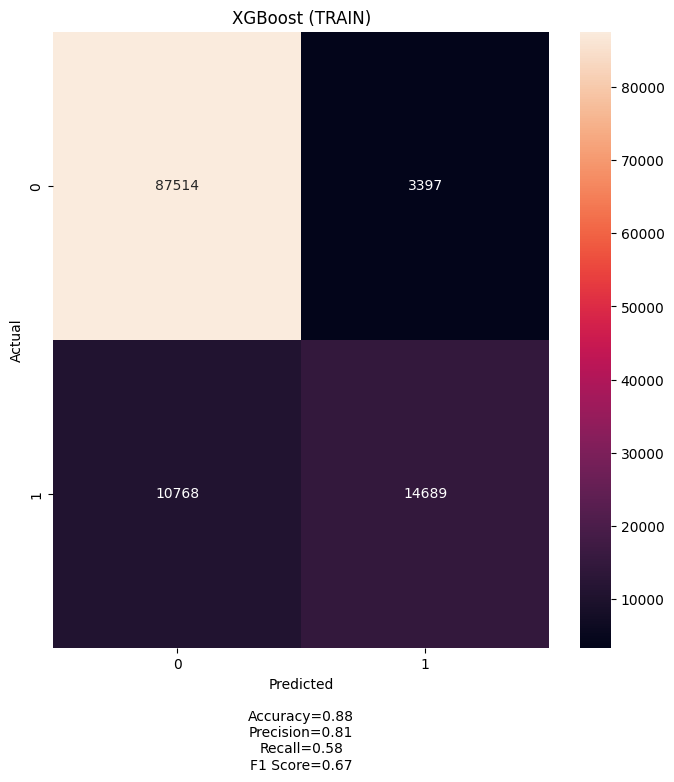

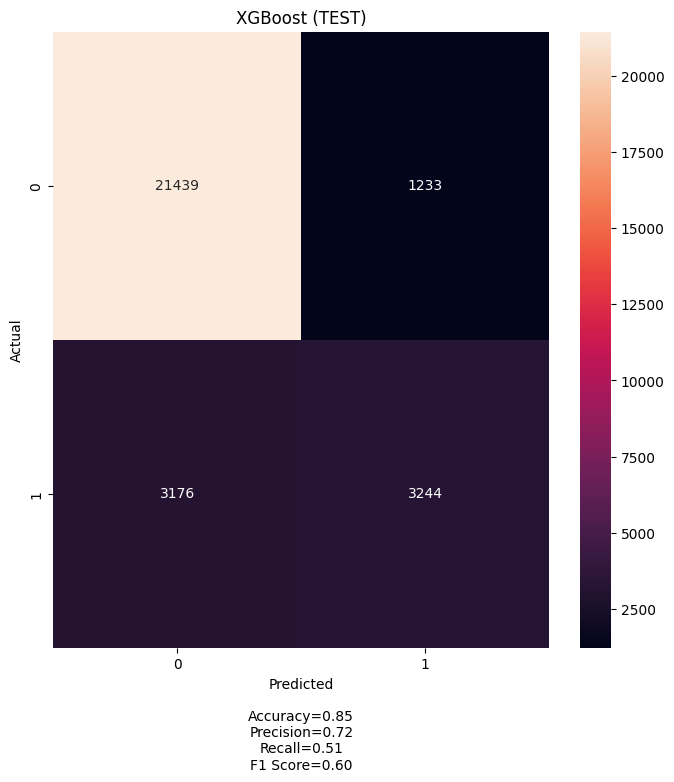

In [36]:
#Predict the data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Visualizing the data
visualize_preds(y_train,y_train_pred, title = 'XGBoost (TRAIN)')
visualize_preds(y_test,y_test_pred, title = 'XGBoost (TEST)')


As can be seen, the model did the better job on both train set and test set.